In [1]:
# %%
# EDA of NYC tickets data using Dask
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dask.distributed import Client


In [2]:

# Set up Dask client
client = Client(n_workers=16, threads_per_worker=2, memory_limit='8GB')
print(client)


<Client: 'tcp://127.0.0.1:38779' processes=16 threads=32, memory=119.21 GiB>


In [3]:

# Read data
data = dd.read_parquet('/d/hpc/projects/FRI/bigdata/students/dp8949/parquet_data/*.parquet')


In [4]:
data.dtypes

Summons Number                                 int64
Plate ID                             string[pyarrow]
Registration State                   string[pyarrow]
Plate Type                           string[pyarrow]
Issue Date                           string[pyarrow]
Violation Code                                 int64
Vehicle Body Type                    string[pyarrow]
Vehicle Make                         string[pyarrow]
Issuing Agency                       string[pyarrow]
Street Code1                                   int64
Street Code2                                   int64
Street Code3                                   int64
Vehicle Expiration Date              string[pyarrow]
Violation Location                           float64
Violation Precinct                             int64
Issuer Precinct                                int64
Issuer Code                                    int64
Issuer Command                       string[pyarrow]
Issuer Squad                         string[py

In [5]:

# Check data
print(data.head())
print(data.info())
print(data.describe().compute())

# Check for missing values
print(data.isnull().sum().compute())

# Check for duplicates
# print(data.duplicated().sum().compute())

# # Drop duplicates
# data = data.drop_duplicates()

# # Drop columns with missing values
# data = data.dropna(axis=1)



   Summons Number Plate ID Registration State Plate Type  Issue Date  \
0      1361929741  FCJ5493                 NY        PAS  12/18/1970   
1      1366962000  63540MC                 NY        COM  02/02/1971   
2      1342296187  GCY4187                 NY        SRF  09/18/1971   
3      1342296199  95V6675                 TX        PAS  09/18/1971   
4      1342296217  FYM5117                 NY        SRF  09/18/1971   

   Violation Code Vehicle Body Type Vehicle Make Issuing Agency  Street Code1  \
0              20              SUBN          GMC              S         35030   
1              46              DELV        FRUEH              P         58830   
2              21               VAN         FORD              S         11790   
3              21              <NA>          GMC              S         11790   
4              21              SUBN        NISSA              S         28190   

   ...  Vehicle Color  Unregistered Vehicle? Vehicle Year  Meter Number  \
0  ..

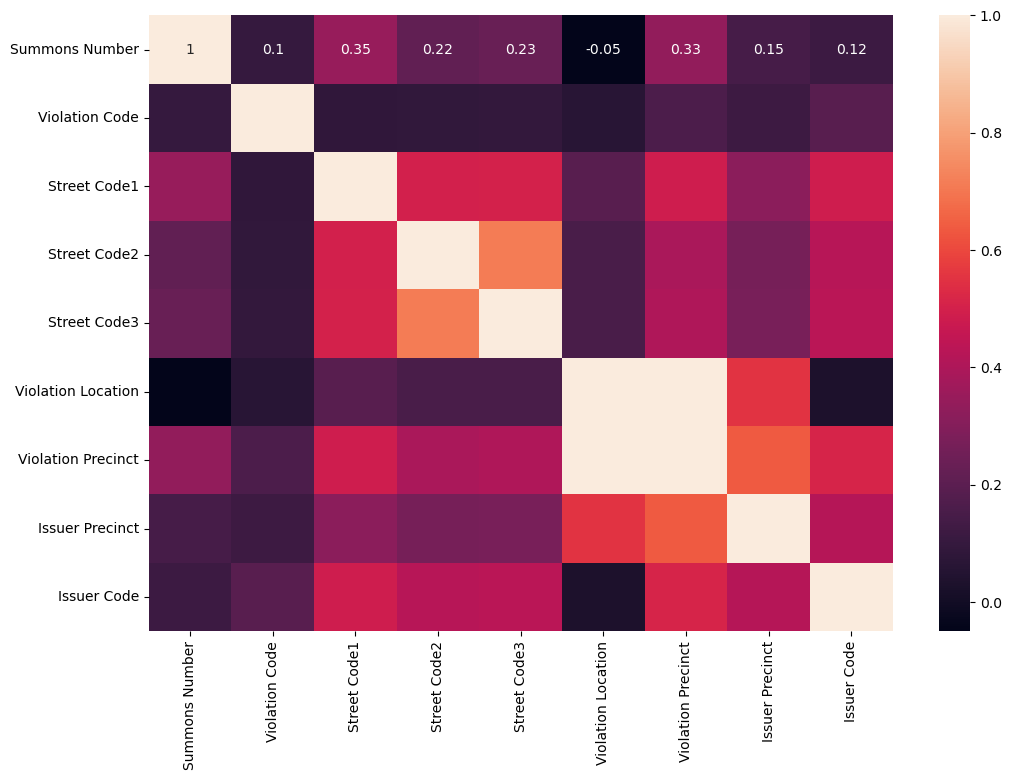

In [6]:

# Correlation
plt.figure(figsize=(12, 8))
# Numeric columns
col_num = data.select_dtypes(include=np.number).columns
sns.heatmap(data[col_num].corr().compute(), annot=True)
plt.show()


In [7]:
# cols = data.columns
# # Check for outliers
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=data[cols[1:]].compute())
# plt.xticks(rotation=90)
# plt.show()



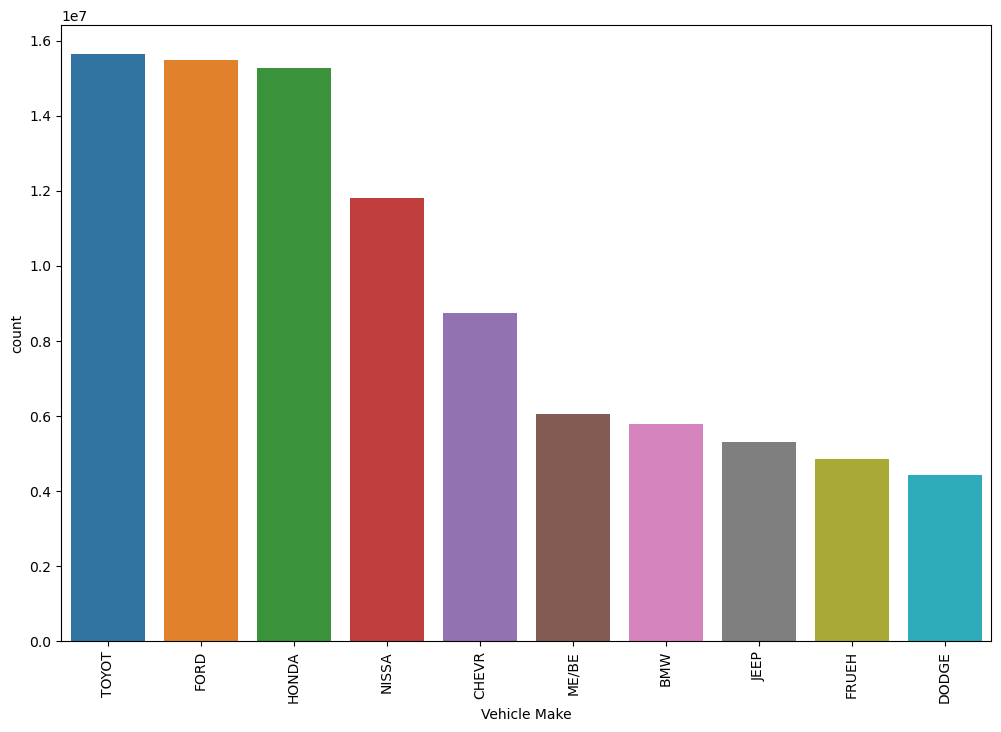

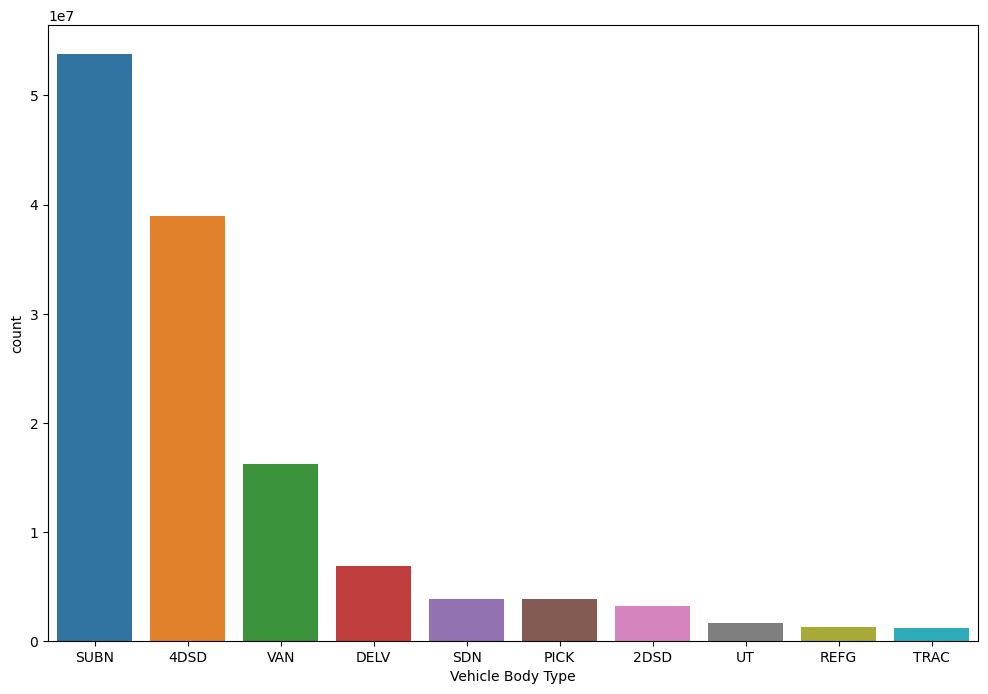

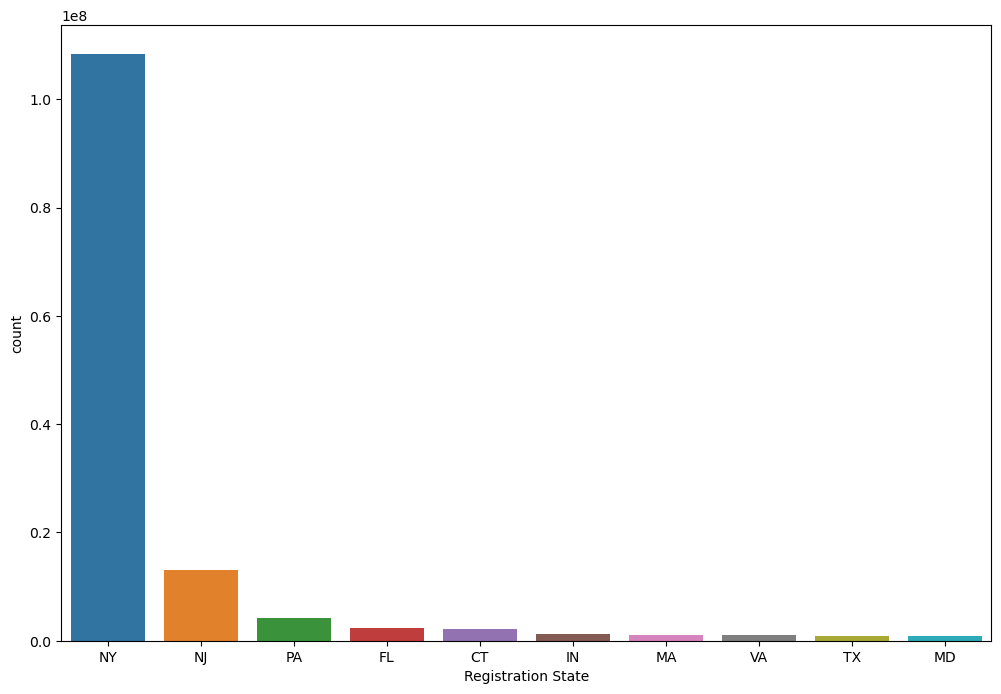

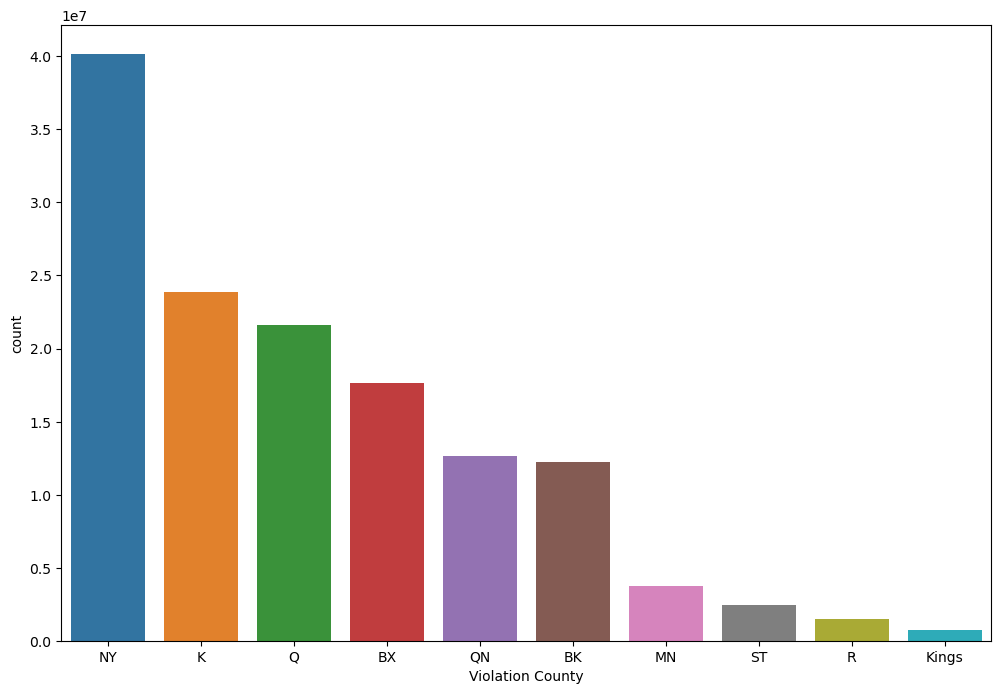

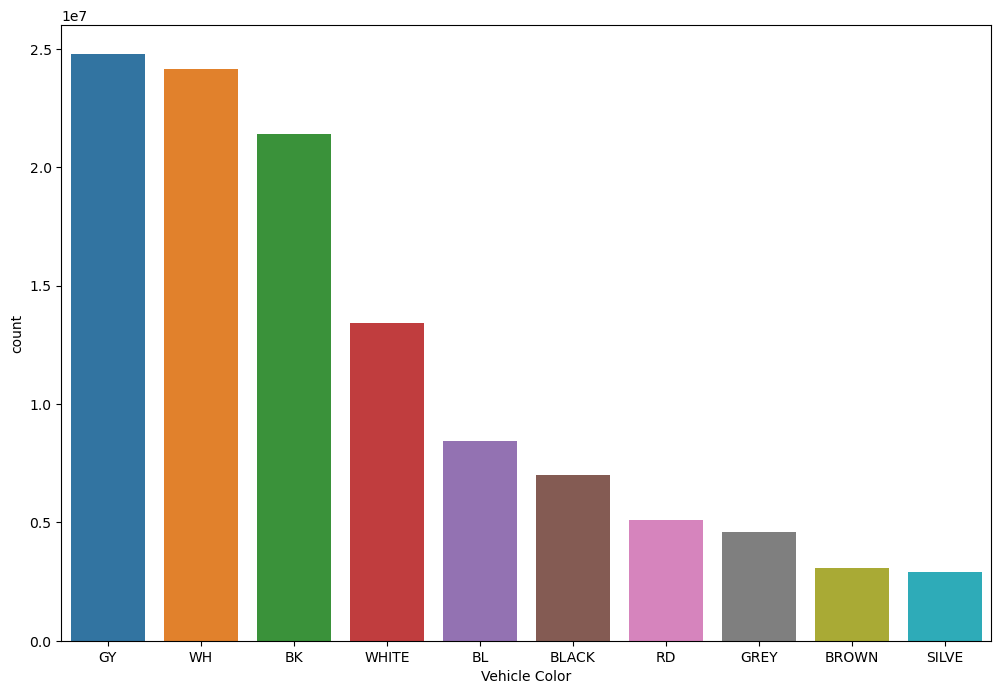

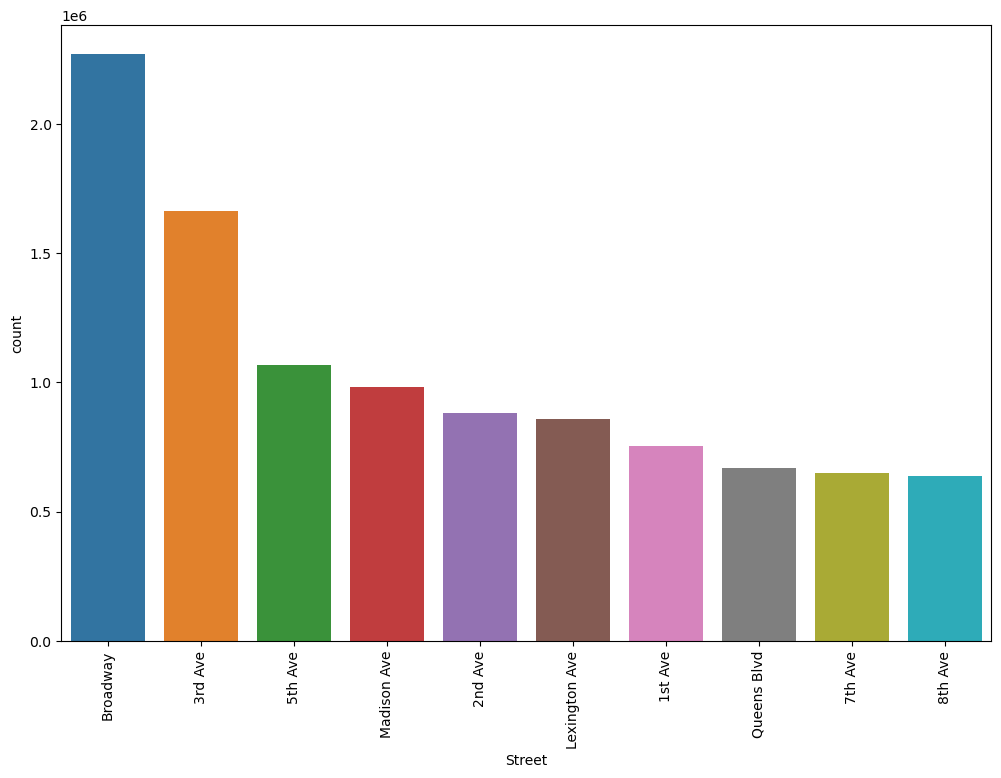

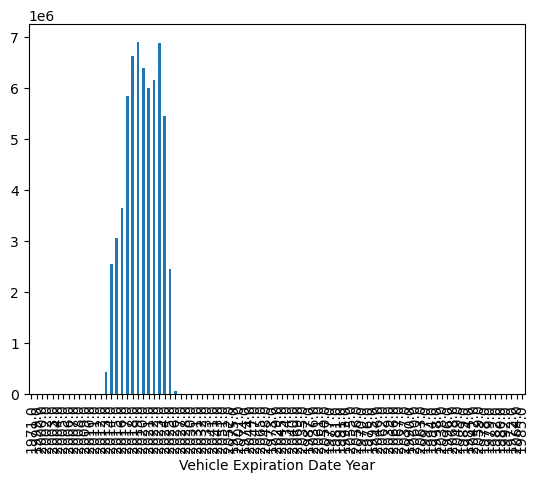

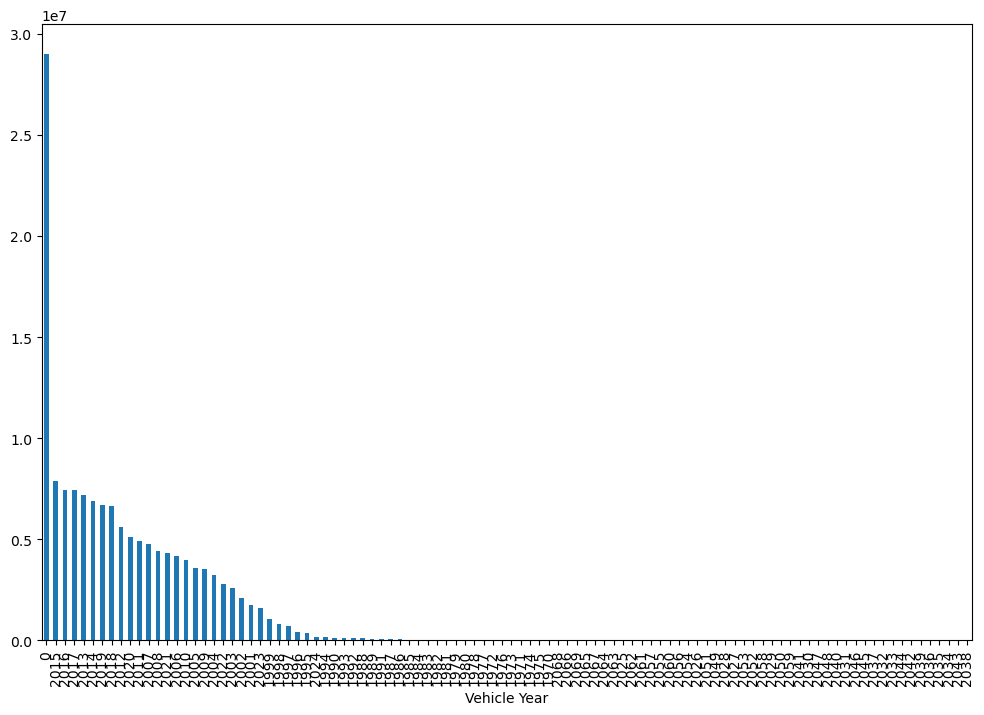

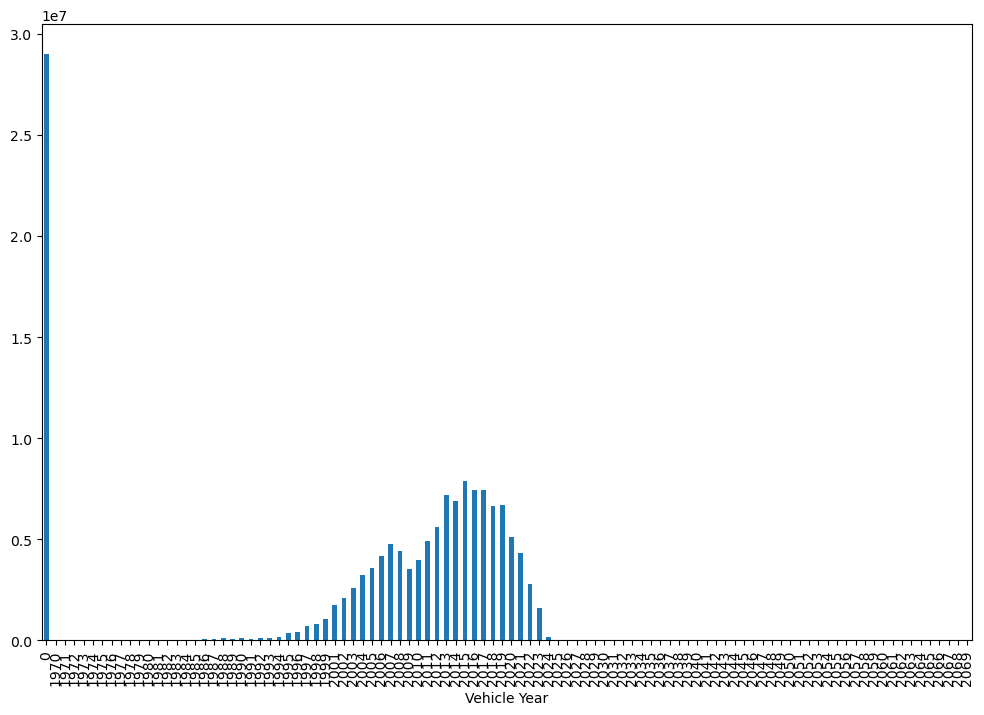

/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/cor

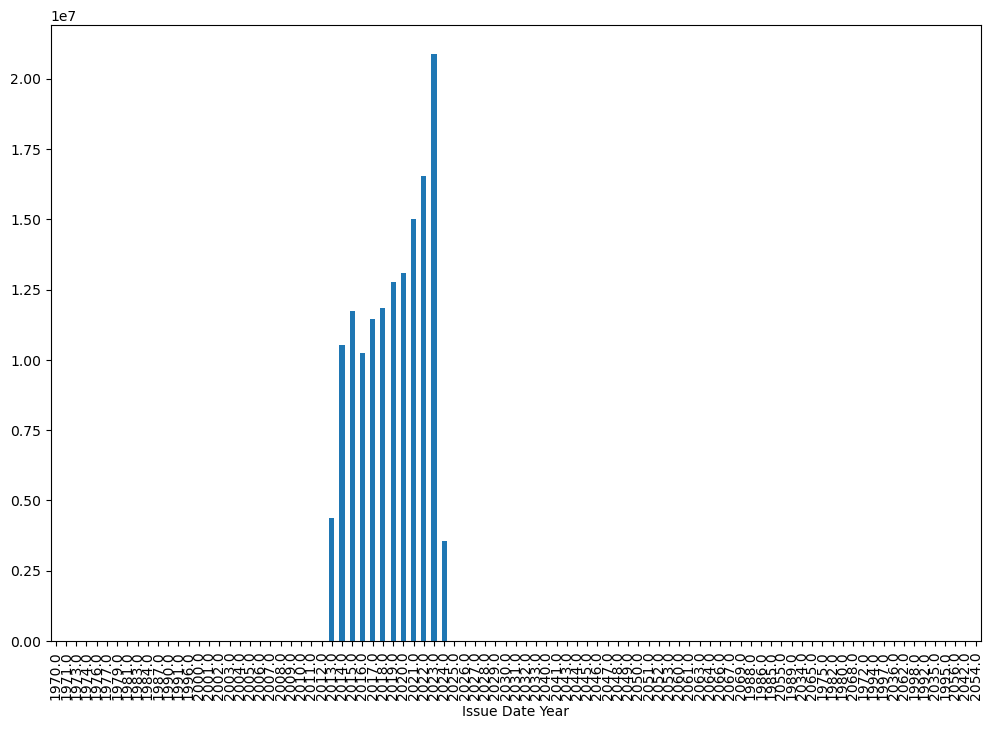

/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/cor

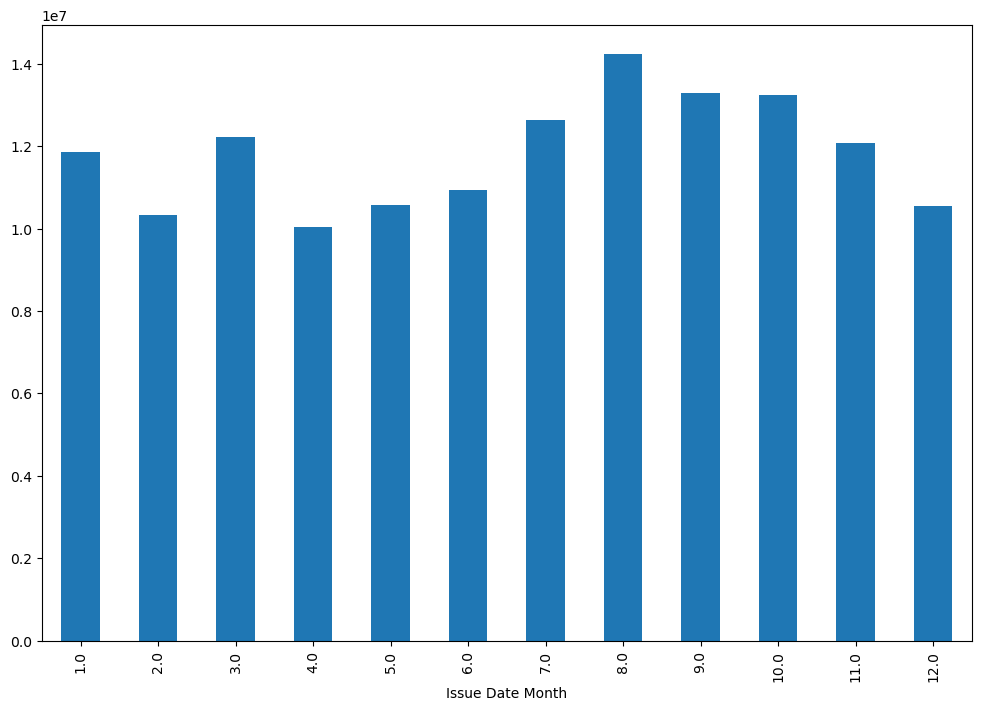

/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/cor

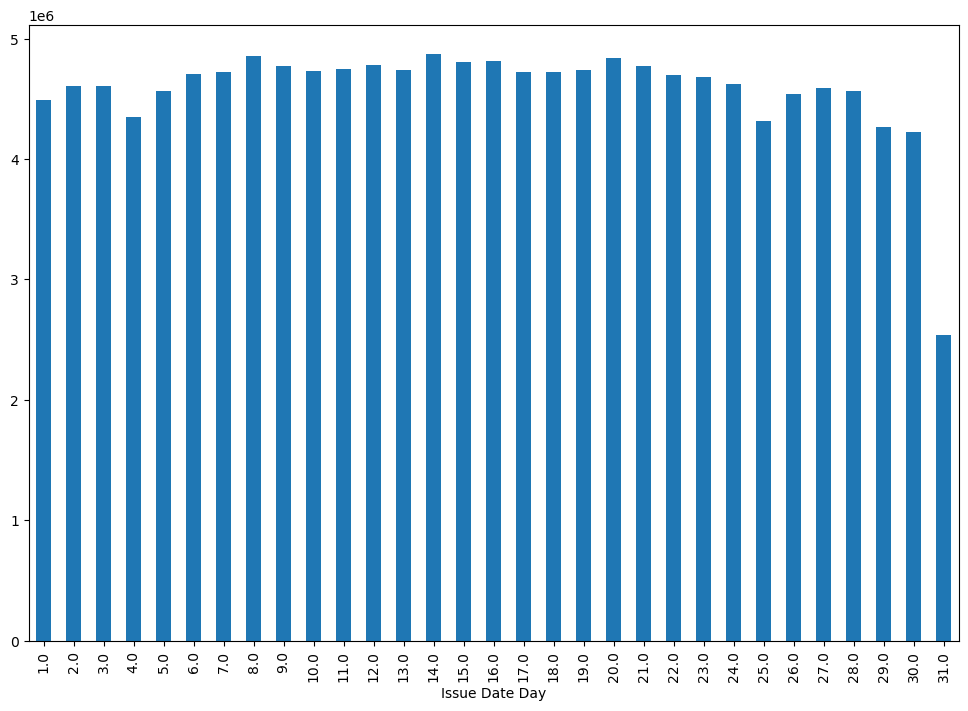

In [20]:
# Number of violations by vehicle make
plt.figure(figsize=(12, 8))
vehicle_make_counts = data['Vehicle Make'].value_counts().compute()
sns.barplot(x=vehicle_make_counts.index[:10], y=vehicle_make_counts[:10])
plt.xticks(rotation=90)
plt.show()

# Check for class imbalance in vehicle body type
plt.figure(figsize=(12, 8))
vehicle_body_type_counts = data['Vehicle Body Type'].value_counts().compute()
sns.barplot(x=vehicle_body_type_counts.index[:10], y=vehicle_body_type_counts[:10])
plt.show()

# Number of violations by registration state
plt.figure(figsize=(12, 8))
registration_state_counts = data['Registration State'].value_counts().compute()
sns.barplot(x=registration_state_counts.index[:10], y=registration_state_counts[:10])
plt.show()

# Number of violations by county
plt.figure(figsize=(12, 8))
violation_county_counts = data['Violation County'].value_counts().compute()
sns.barplot(x=violation_county_counts.index[:10], y=violation_county_counts[:10])
plt.show()

# Number of violations by color
plt.figure(figsize=(12, 8))
vehicle_color_counts = data['Vehicle Color'].value_counts().compute()
sns.barplot(x=vehicle_color_counts.index[:10], y=vehicle_color_counts[:10])
plt.show()

# Top 10 streets with most violations
plt.figure(figsize=(12, 8))
street_counts = data['Street'].value_counts().compute()
sns.barplot(x=street_counts.index[:10], y=street_counts[:10])
plt.xticks(rotation=90)
plt.show()

# Number of violations by vehicle expiration date: example: 20140728
data['Vehicle Expiration Date'] = dd.to_datetime(data['Vehicle Expiration Date'], format='%Y%m%d', errors='coerce')
data['Vehicle Expiration Date Year'] = data['Vehicle Expiration Date'].dt.year
data['Vehicle Expiration Date Month'] = data['Vehicle Expiration Date'].dt.month
data['Vehicle Expiration Date Day'] = data['Vehicle Expiration Date'].dt.day

data.groupby('Vehicle Expiration Date Year').size().compute().plot(kind='bar')
plt.show()

# Number of violations by vehicle year
plt.figure(figsize=(12, 8))
data['Vehicle Year'].value_counts().compute().plot(kind='bar')
plt.show()
# Order by year
plt.figure(figsize=(12, 8))
data['Vehicle Year'].value_counts().compute().sort_index().plot(kind='bar')
plt.show()

# Number of violations by issue date - year, month, day - example: 12/18/1970
data['Issue Date'] = dd.to_datetime(data['Issue Date'])
data['Issue Date Year'] = data['Issue Date'].dt.year
data['Issue Date Month'] = data['Issue Date'].dt.month
data['Issue Date Day'] = data['Issue Date'].dt.day

plt.figure(figsize=(12, 8))
data.groupby('Issue Date Year').size().compute().plot(kind='bar')
plt.show()

plt.figure(figsize=(12, 8))
data.groupby('Issue Date Month').size().compute().plot(kind='bar')
plt.show()

plt.figure(figsize=(12, 8))
data.groupby('Issue Date Day').size().compute().plot(kind='bar')
plt.show()

In [24]:
def clean_time(t):
    if isinstance(t, str) and len(t) == 5 and t[:2].isdigit() and t[2:4].isdigit() and t[4] in ['A', 'P']:
        return t
    return np.nan

# Apply the cleaning function to the 'Violation Time' column
data['Cleaned Time'] = data['Violation Time'].map_partitions(lambda df: df.apply(clean_time), meta=('Cleaned Time', 'object'))

# Filter out rows with invalid times
data = data.dropna(subset=['Cleaned Time'])

# Convert to datetime format directly
data['Violation Time1'] = dd.to_datetime(data['Cleaned Time'].str[:-1] + data['Cleaned Time'].str[-1].replace({'A': ' AM', 'P': ' PM'}), format='%I%M %p', errors='coerce')

# Violation time (Hour and Minute)
data['Violation Time Hour'] = data['Violation Time1'].dt.hour
data['Violation Time Minute'] = data['Violation Time1'].dt.minute

In [ ]:
# Plotting the distribution of Violation Time Hour
plt.figure(figsize=(12, 8))
data.groupby('Violation Time Hour').size().compute().plot(kind='bar')
plt.xlabel('Hour of Violation Time')
plt.ylabel('Number of Violations')
plt.title('Distribution of Violations by Hour')
plt.show()

# Plotting the distribution of Violation Time Minute
plt.figure(figsize=(12, 8))
data.groupby('Violation Time Minute').size().compute().plot(kind='bar')
plt.xlabel('Minute of Violation Time')
plt.ylabel('Number of Violations')
plt.title('Distribution of Violations by Minute')
plt.show()

# Resample and plot monthly data from dsort
plt.figure(figsize=(20, 8))
dsort_resampled = dsort.resample('M').sum()
dsort_resampled.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.title('Monthly Number of Violations')
plt.show()

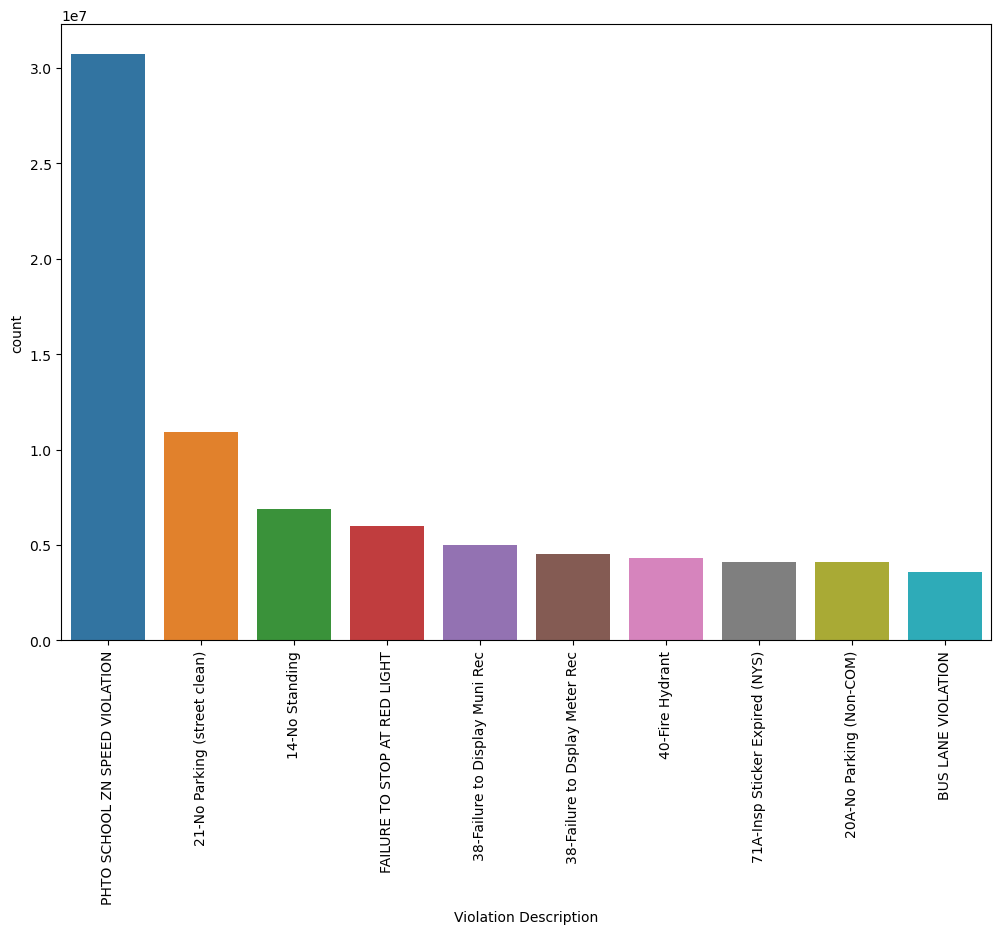

In [5]:
# Violation description
plt.figure(figsize=(12, 8))
violation_description_counts = data['Violation Description'].value_counts().compute()
sns.barplot(x=violation_description_counts.index[:10], y=violation_description_counts[:10])
plt.xticks(rotation=90)
plt.show()


In [6]:

data['Issue Date1'] = dd.to_datetime(data['Issue Date'])



/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/cor

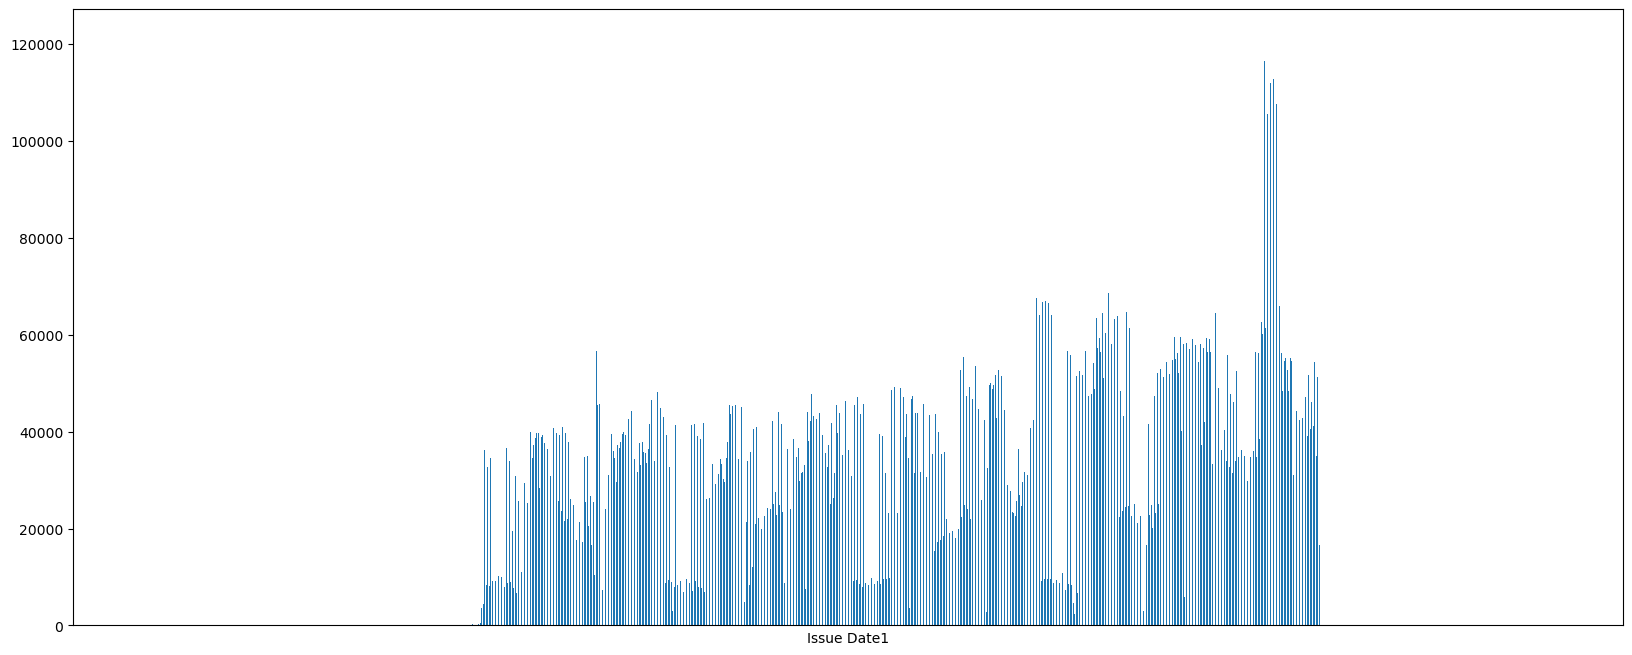

In [7]:

# Number of violations for each day, order by date
plt.figure(figsize=(20, 8))
data['Issue Date1'].value_counts().compute().sort_index().plot(kind='bar')
# No x ticks
plt.xticks([])
plt.show()



/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/core.py:7256: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = func(*args, **kwargs)
/d/hpc/home/dp8949/.conda/envs/bd39/lib/python3.9/site-packages/dask/dataframe/cor

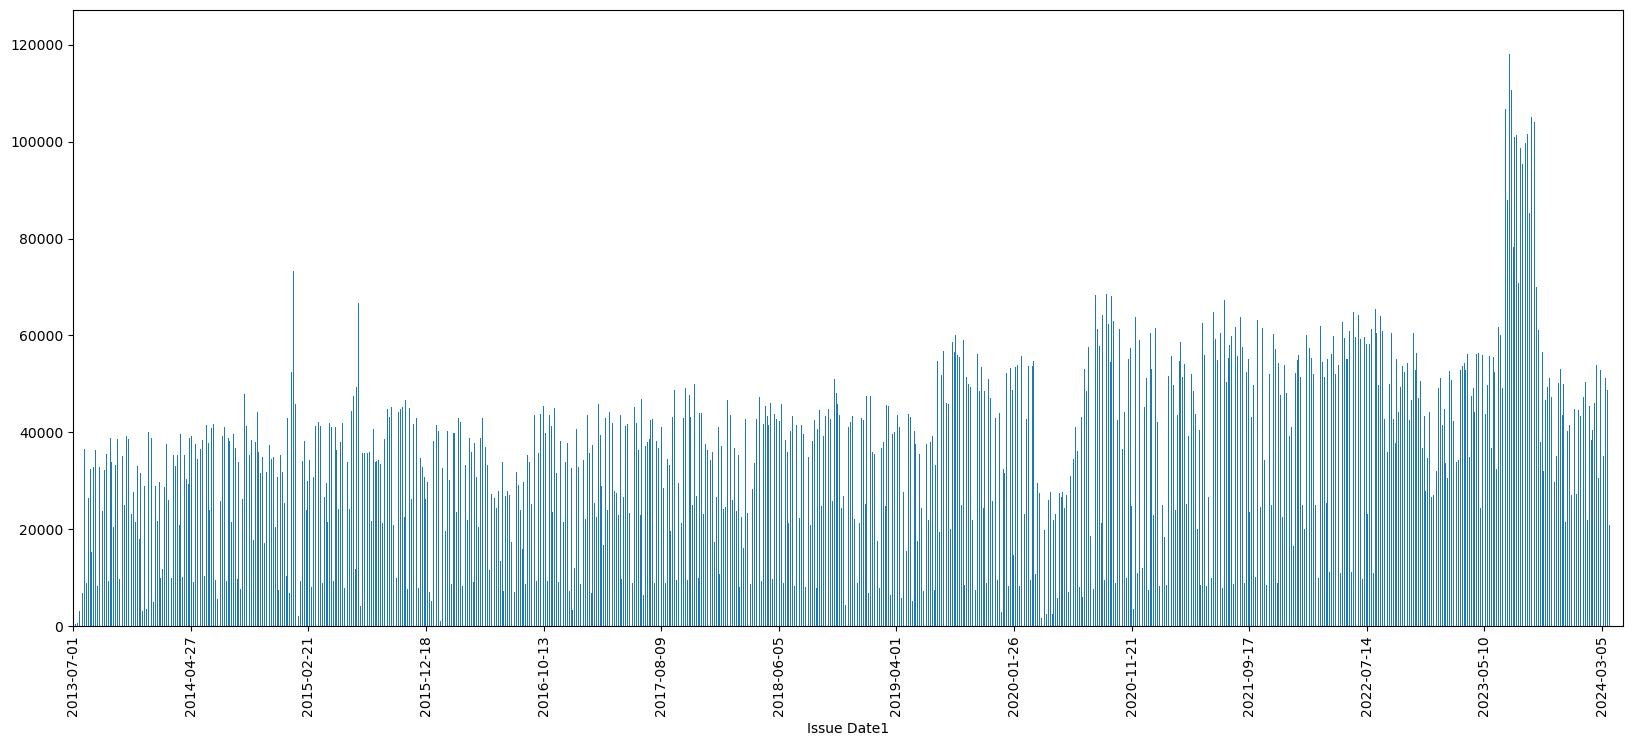

In [9]:
# Issue date between 2014-01-01 and 2014-01-31
plt.figure(figsize=(20, 8))
d1314 = data[(data['Issue Date1'] >= '2013-07-01') & (data['Issue Date1'] <= '2024-05-01')]['Issue Date1']
dsort = d1314.value_counts().compute().sort_index()
dsort.plot(kind='bar')
dsort.index = dsort.index.date
plt.xticks(range(0, len(dsort), 300), dsort.index[::300], rotation=90)
plt.show()


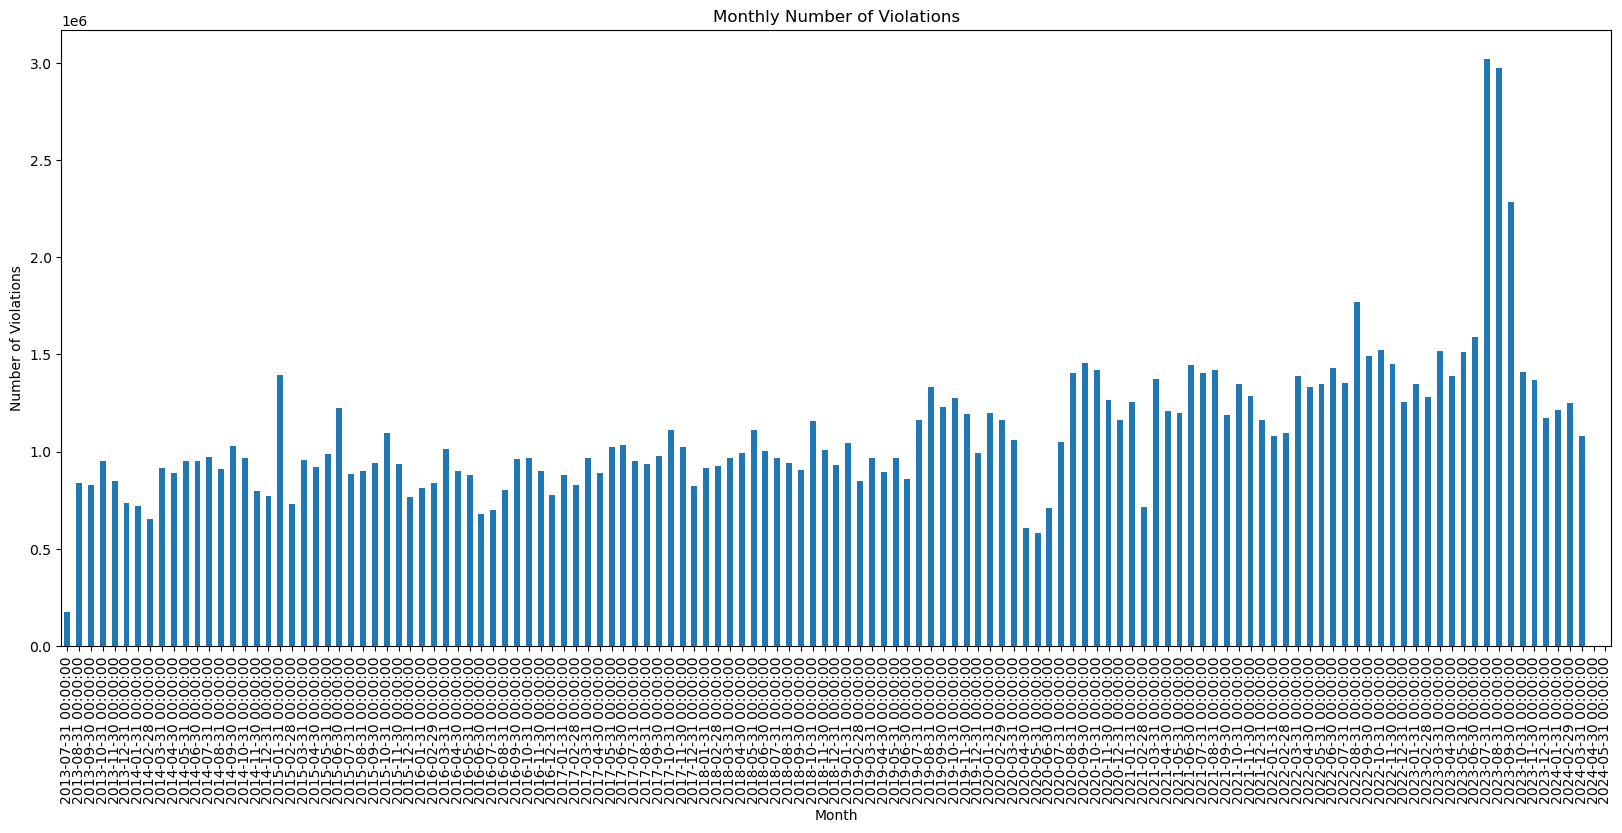

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

dsort.index = pd.to_datetime(dsort.index)

# Assuming dsort is already computed and contains daily counts
dsort = dsort.resample('M').sum()

# Plot the monthly accumulated data
plt.figure(figsize=(20, 8))
dsort.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.title('Monthly Number of Violations')
plt.show()
